# Customer Churn Prediction using Classification

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load datasets
df_20 = pd.read_csv('/home/user/Documents/Customer churn classification/churn-bigml-20.csv')
df_80 = pd.read_csv('/home/user/Documents/Customer churn classification/churn-bigml-80.csv')

### Data understanding

In [3]:
df_20.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
print(f"df_20 dataset shape: {df_20.shape}")

df_20 dataset shape: (667, 20)


In [5]:
df_80.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
print(f"df_80 dataset shape: {df_80.shape}")

df_80 dataset shape: (2666, 20)


In [7]:
# Combine the datasets for EDA
df = pd.concat([df_80, df_20], ignore_index=True)

In [8]:
print(f"Combined dataset shape: {df.shape}")

Combined dataset shape: (3333, 20)


In [9]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [11]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [13]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

### EDA

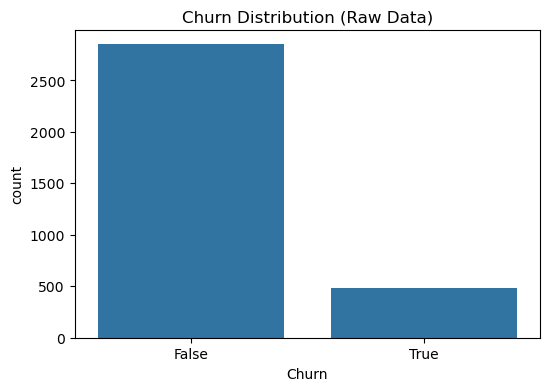

Churn rate: 14.49% (483 out of 3333)


In [14]:
#Target variable distribution (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (Raw Data)')
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

churn_rate = df['Churn'].mean()
print(f"Churn rate: {churn_rate:.2%} ({df['Churn'].sum()} out of {len(df)})")

In [15]:
#X-axis (Churn): This axis displays the two possible values for the target variable: False and True.
#False: Represents customers who did not churn (stayed with the service).
#True: Represents customers who did churn (left the service).
#Y-axis (count): This axis shows the number of customers (frequency) for each category.
#The Bars:
#The bar for False is very tall, reaching approximately 2,800 on the count axis. This means there are around 2,800 customers in the
#dataset who did not churn.
#The bar for True is much shorter, reaching approximately 500 on the count axis. This means there are around 500 customers who did 
#churn.

In [16]:
#Categorical variables – unique values & distributions
categorical_cols = ['State', 'Area code', 'International plan', 'Voice mail plan']
for col in categorical_cols:
    if df[col].nunique() <= 5:
        print(df[col].value_counts())

Area code
415    1655
510     840
408     838
Name: count, dtype: int64
International plan
No     3010
Yes     323
Name: count, dtype: int64
Voice mail plan
No     2411
Yes     922
Name: count, dtype: int64


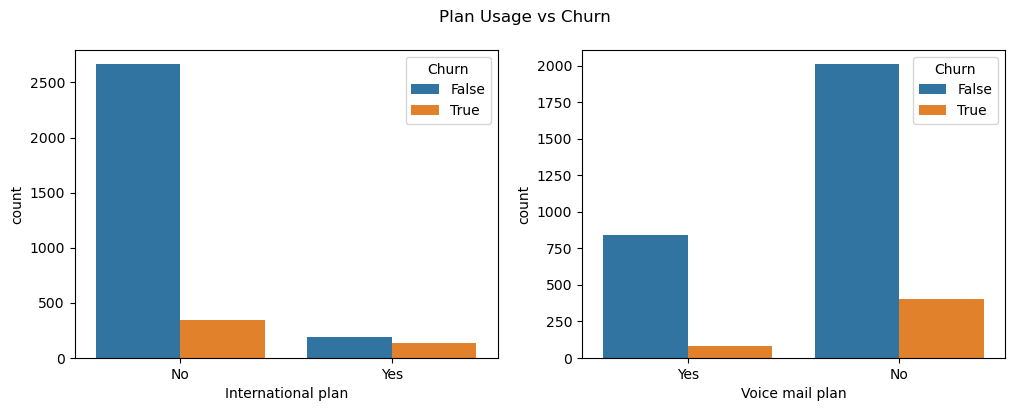

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])
plt.suptitle('Plan Usage vs Churn')
plt.show()

In [18]:
#International Plan = Higher Risk of Churn: Customers with an international plan are more likely to leave.
#Voice Mail Plan = Lower Risk of Churn: Customers with a voice mail plan are less likely to leave.

In [19]:
# Numerical features – distributions
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'Churn']

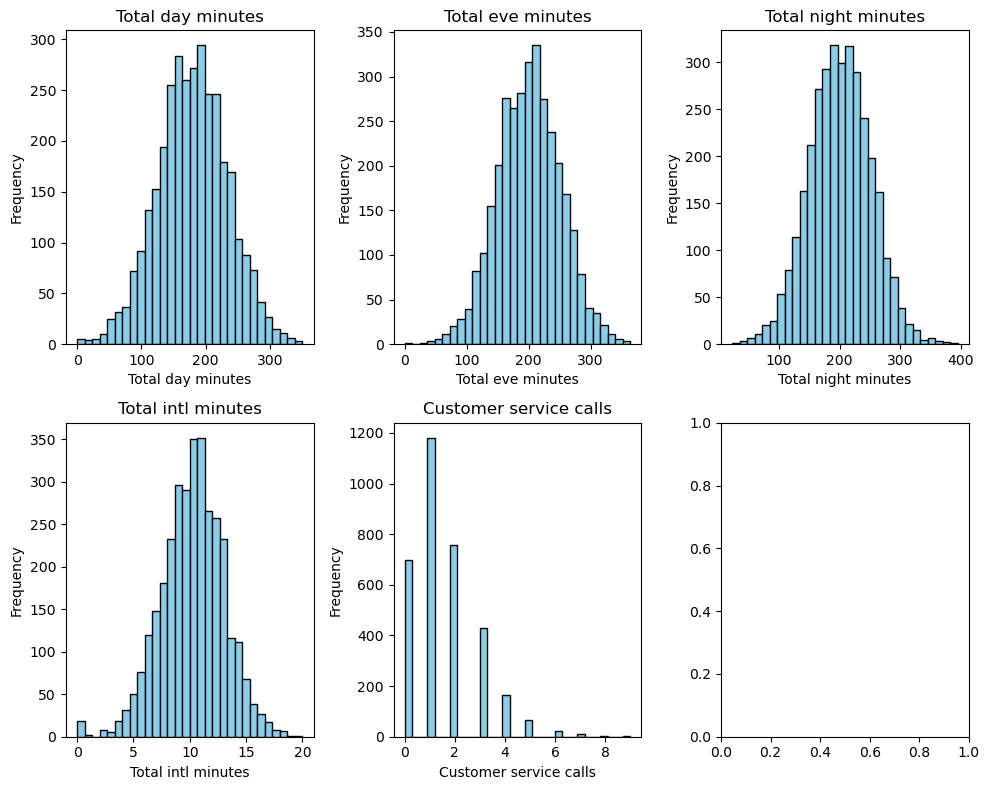

In [20]:
# Plot histograms for key usage metrics
usage_cols = [
    'Total day minutes', 'Total eve minutes', 'Total night minutes',
    'Total intl minutes', 'Customer service calls'
]

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()
for i, col in enumerate(usage_cols):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.savefig('usage_metrics_histograms.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [21]:
# Customers' usage patterns across day, evening, and night are all normally distributed and centered around 200 minutes. This indicates 
# consistent, moderate usage across different times of day for most customers.
#International Usage: Very low for most customers (many use 0 minutes), suggesting it's a niche feature.
#Customer Service Calls: A critical predictor. Most customers rarely call, but those who call frequently (e.g., 4+) are a small, 
#potentially high-risk group.
#Usage: Most customers have moderate, consistent usage patterns across day, evening, and night.
#International Plans: Very few customers actually use international minutes, which aligns with the earlier finding that only ~10% of 
#customers have an international plan.
#Service Interaction: Customer service calls are rare for most, making them a strong potential signal for churn. A customer calling 
#multiple times is unusual and may indicate dissatisfaction.

### Pre-processing 

In [22]:
# Convert binary plans to 0/1
df['International plan'] = df['International plan'].map({'No': 0, 'Yes': 1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No': 0, 'Yes': 1})

In [23]:
# Encode 'State' using LabelEncoder
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

In [24]:
# Convert target 'Churn' to binary
df['Churn'] = df['Churn'].map({False: 0, True: 1})

In [25]:
# Correlation with target
corr_with_churn = df.corr()['Churn'].abs().sort_values(ascending=False)
print("\nTop features correlated with Churn:")
print(corr_with_churn.head(10))


Top features correlated with Churn:
Churn                     1.000000
International plan        0.259852
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Voice mail plan           0.102148
Total eve minutes         0.092796
Total eve charge          0.092786
Number vmail messages     0.089728
Total intl charge         0.068259
Name: Churn, dtype: float64


In [26]:
# Train-test split
X = df.drop(columns=['Churn'])
y = df['Churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Modelling

In [28]:
# Logistic Regression 
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [29]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.7721139430284858
ROC-AUC: 0.8277988786398988
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       570
           1       0.37      0.77      0.50        97

    accuracy                           0.77       667
   macro avg       0.66      0.77      0.67       667
weighted avg       0.87      0.77      0.80       667



In [30]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [31]:
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.9430284857571214
ROC-AUC: 0.9352685838307107
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       570
           1       0.95      0.64      0.77        97

    accuracy                           0.94       667
   macro avg       0.95      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667



In [32]:
# XGBoost 
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [33]:
print("\n=== XGBoost (Baseline) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_xgb))


=== XGBoost (Baseline) ===
Accuracy: 0.9505247376311844
ROC-AUC: 0.9415445831072528
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.96      0.69      0.80        97

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



In [34]:
#Hyperparameter Tuning for XGBoost using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [35]:
xgb_tuned = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

grid_search = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [36]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [4, 6, ...], 'n_estimators': [100, 200], 'subsample': [0.8, 1.0]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [37]:
print(" Best parameters:", grid_search.best_params_)

 Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}


In [38]:
# Evaluate tuned model
best_xgb = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
y_proba_xgb_tuned = best_xgb.predict_proba(X_test)[:,1]

In [39]:
print("\n=== XGBoost (Tuned) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb_tuned))
print(classification_report(y_test, y_pred_xgb_tuned))


=== XGBoost (Tuned) ===
Accuracy: 0.9550224887556222
ROC-AUC: 0.9385060589618376
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.95      0.73      0.83        97

    accuracy                           0.96       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.95      0.96      0.95       667



**-** For Class 0 (Non-churners):
Precision = 0.96
→ Of all customers predicted as non-churners, 96% were correct (i.e., only 4% were false negatives—actually churners mislabeled as non-churners).
Recall = 0.99
→ The model correctly identified 99% of actual non-churners (i.e., it missed only 1% of them).
F1-Score = 0.97
→ Harmonic mean of precision and recall—high, indicating strong performance on this class.
The model is excellent at identifying customers who stay.

For Class 1 (Churners):
Precision = 0.95
→ Of all customers predicted as churners, 95% actually churned (only 5% were false alarms—loyal customers wrongly flagged as churners).
Recall = 0.73
→ The model only caught 73% of actual churners.
→ 27% of churners were missed (classified as non-churners)—these are false negatives.
F1-Score = 0.83
→ Good balance, but lower than for class 0 due to modest recall.
While the model is very reliable when it predicts churn, it misses about 1 in 4 actual churners—this is the main area for improvement.

In [40]:
#Feature Importance with Tuned XGBoost
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

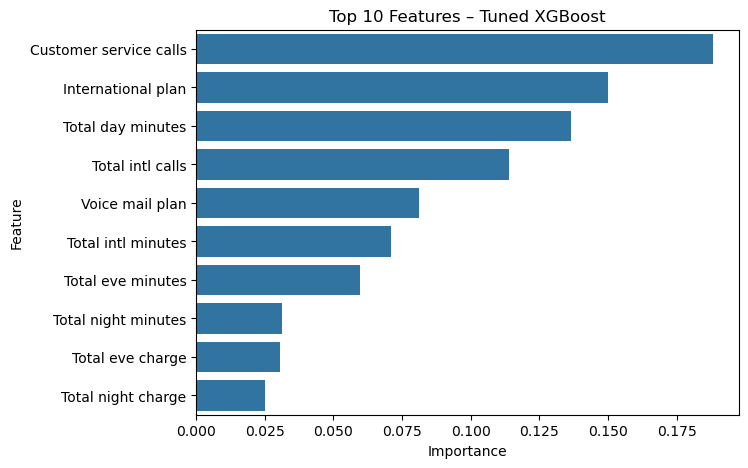

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features – Tuned XGBoost')
plt.savefig('top_10_features_tuned_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
#Most Important Feature: Customer service calls
#This is the single most important predictor of churn. The bar is significantly longer than any other, indicating it has the highest 
#importance score (≈0.18).
#Business Insight: Customers who call customer service frequently are at the highest risk of churning. This is a critical signal for
#retention teams.

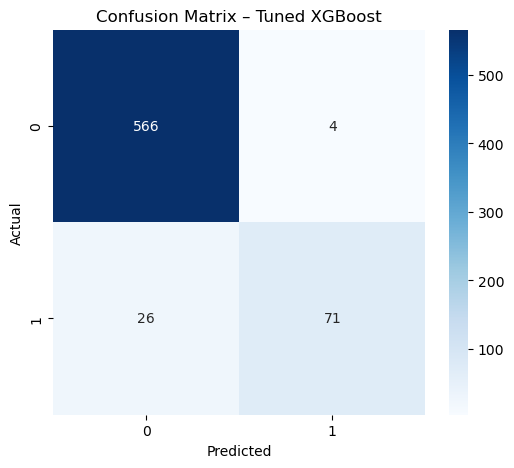

In [43]:
#Confusion Matrix for Best Model (Tuned XGBoost)
cm = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
#Top-Left (566): True Negatives (TN) - The model correctly predicted 0 (No Churn) for customers who actually did not churn.
#Top-Right (4): False Positives (FP) - The model incorrectly predicted 1 (Churn) for customers who actually did not churn. These are
#"false alarms."
#Bottom-Left (26): False Negatives (FN) - The model incorrectly predicted 0 (No Churn) for customers who actually did churn. This is 
#the most critical error for this problem, as you want to identify these customers to retain them.
#Bottom-Right (71): True Positives (TP) - The model correctly predicted 1 (Churn) for customers who actually churned.

In [45]:
# Summary
print("\n Final Model Comparison (ROC-AUC):")
print("Logistic Regression:", round(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]), 4))
print("Random Forest:     ", round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]), 4))
print("XGBoost (Baseline): ", round(roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]), 4))
print("XGBoost (Tuned):   ", round(roc_auc_score(y_test, y_proba_xgb_tuned), 4))


 Final Model Comparison (ROC-AUC):
Logistic Regression: 0.8278
Random Forest:      0.9353
XGBoost (Baseline):  0.9415
XGBoost (Tuned):    0.9385


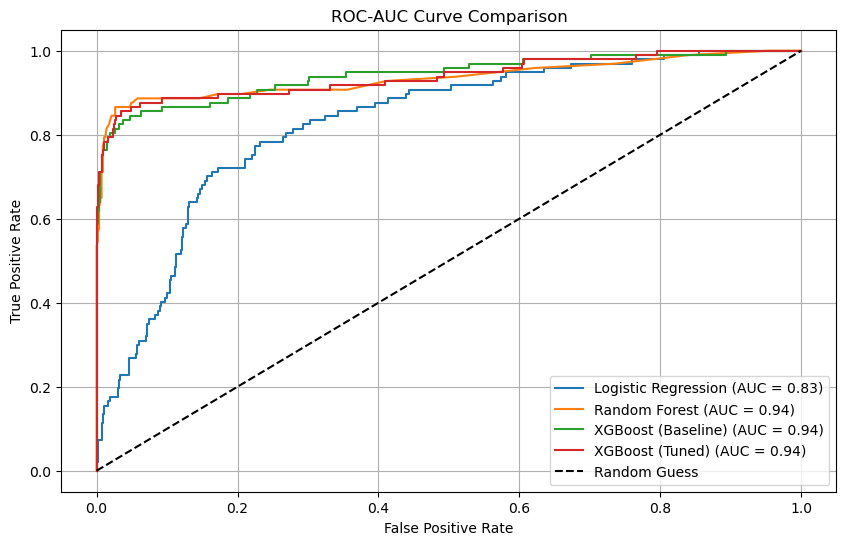

In [46]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# XGBoost (Baseline)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (Baseline) (AUC = {auc_xgb:.2f})')

# XGBoost (Tuned)
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, y_proba_xgb_tuned)
auc_xgb_tuned = auc(fpr_xgb_tuned, tpr_xgb_tuned)
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'XGBoost (Tuned) (AUC = {auc_xgb_tuned:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC-AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('roc_auc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [47]:
#Blue Line (Logistic Regression, AUC = 0.83): This model performs the worst among the four. Its curve is closest to the diagonal
#"Random Guess" line, indicating it has less discriminatory power.
#Orange & Green Lines (Random Forest & XGBoost Baseline, both AUC = 0.94): These two models perform very similarly and significantly 
#better than Logistic Regression. Their curves are much closer to the top-left corner, meaning they are much better at identifying true
#churners while keeping false positives low.
#Red Line (XGBoost Tuned, AUC = 0.94): This is the best-performing model. While its AUC is numerically identical to the baseline 
#XGBoost, its curve is slightly higher in some regions, suggesting it might be marginally better at certain thresholds.

In [48]:
import joblib
joblib.dump(best_xgb, 'xgboost_churn_model.pkl')

['xgboost_churn_model.pkl']